In [1]:
!pip install spicy
!pip install matplotlib
!pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [3]:
def total_b(pdf: list, b_right: bool):
    if b_right:
        total_prob = []
        for i, prob in enumerate(pdf):
            total_prob.append(prob * (len(pdf) - i - 1) / (len(pdf) - 1))
        return sum(total_prob)
    total_prob = []
    for i, prob in enumerate(pdf):
        total_prob.append(prob * i / (len(pdf) - 1))
    return sum(total_prob)

In [4]:
def b_given_a(a: int, num: int, b_right: bool):
    return (num - a - 1) / (num - 1) if b_right else a / (num - 1)

In [5]:
def update(pdf: list, b_right: bool):
    tb = total_b(pdf, b_right)
    for i in range(len(pdf)):
        pdf[i] = b_given_a(i, len(pdf), b_right) * pdf[i] / tb

In [6]:
n = 100
coin_pos = 28
pdf = [1/n for i in range(n)]

In [7]:
import random
for i in range(100):
    update(pdf, random.randint(0, n - 1) > coin_pos)

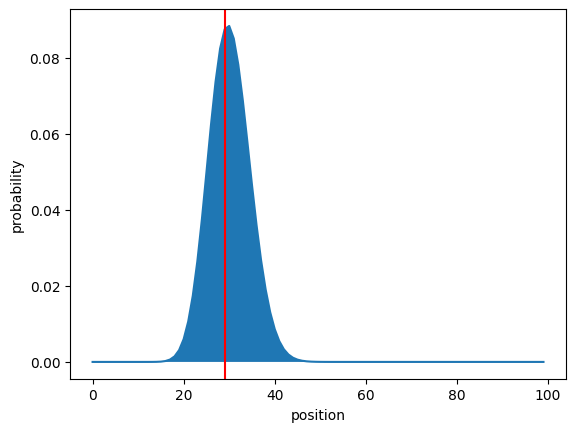

In [8]:
x = [i for i in range(len(pdf))]
 
# Plotting the Graph
plt.plot(x, pdf)
plt.fill_between(x, pdf)
plt.axvline(29, color=(1.0, 0, 0))
plt.xlabel("position")
plt.ylabel("probability")
plt.show()